In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2010-01-01'
end = '2022-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  25 of 25 completed


In [2]:
# Calculating  Daily returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,1.1807%,3.2752%,-0.6862%,-1.5607%,-1.3553%,-0.7576%,0.1772%,-0.3746%,0.4195%,-0.4963%,...,-0.2579%,1.8028%,0.8236%,-1.0445%,-0.4898%,0.3708%,0.3369%,-1.8908%,0.1803%,3.5259%
2010-01-06,1.5684%,3.0334%,0.3455%,-0.0396%,-0.7168%,-0.9715%,-1.1199%,-0.2686%,-0.9303%,-0.3325%,...,-1.1636%,1.3147%,-0.6065%,-1.9275%,-0.9824%,1.9085%,0.9442%,3.4796%,-2.8754%,8.6957%
2010-01-07,-1.5166%,4.0482%,1.6182%,0.0793%,2.1059%,0.9811%,-1.5201%,0.7181%,0.0383%,0.7228%,...,-1.2426%,1.3241%,-0.1370%,1.0294%,-1.1228%,1.2284%,0.0000%,4.4491%,-0.5953%,11.2000%
2010-01-08,-0.5226%,-0.9647%,0.2372%,-1.6640%,-0.2947%,-1.1797%,-0.6356%,2.7273%,0.7471%,0.3312%,...,-0.5298%,0.1307%,-1.8207%,0.4169%,-0.7326%,-0.3979%,1.6836%,0.9410%,0.0630%,-1.6187%
2010-01-11,0.3002%,-1.1851%,-0.5746%,1.0475%,-0.6501%,0.7023%,0.3046%,4.0257%,-0.3042%,2.5860%,...,1.2650%,1.6445%,0.6859%,-0.0461%,-0.4797%,0.2197%,1.1856%,5.3484%,0.4095%,0.6094%


In [37]:
port

In [24]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.


port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)
# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
#rm = 'MV' # Risk measure used, this time will be variance
rm = 'SLPM' # Risk measure used, Second Lower Partial Moment (Sortino Ratio).
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,0.0000%,0.0000%,4.7764%,0.0000%,0.0000%,0.0000%,5.9003%,0.0000%,0.0000%,...,13.4132%,0.0000%,3.5885%,0.0000%,0.0000%,4.9277%,21.3310%,0.0000%,0.0000%,0.0000%


,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,1.1807%,3.2752%,-0.6862%,-1.5607%,-1.3553%,-0.7576%,0.1772%,-0.3746%,0.4195%,-0.4963%,...,-0.2579%,1.8028%,0.8236%,-1.0445%,-0.4898%,0.3708%,0.3369%,-1.8908%,0.1803%,3.5259%
2010-01-06,1.5684%,3.0334%,0.3455%,-0.0396%,-0.7168%,-0.9715%,-1.1199%,-0.2686%,-0.9303%,-0.3325%,...,-1.1636%,1.3147%,-0.6065%,-1.9275%,-0.9824%,1.9085%,0.9442%,3.4796%,-2.8754%,8.6957%
2010-01-07,-1.5166%,4.0482%,1.6182%,0.0793%,2.1059%,0.9811%,-1.5201%,0.7181%,0.0383%,0.7228%,...,-1.2426%,1.3241%,-0.1370%,1.0294%,-1.1228%,1.2284%,0.0000%,4.4491%,-0.5953%,11.2000%
2010-01-08,-0.5226%,-0.9647%,0.2372%,-1.6640%,-0.2947%,-1.1797%,-0.6356%,2.7273%,0.7471%,0.3312%,...,-0.5298%,0.1307%,-1.8207%,0.4169%,-0.7326%,-0.3979%,1.6836%,0.9410%,0.0630%,-1.6187%
2010-01-11,0.3002%,-1.1851%,-0.5746%,1.0475%,-0.6501%,0.7023%,0.3046%,4.0257%,-0.3042%,2.5860%,...,1.2650%,1.6445%,0.6859%,-0.0461%,-0.4797%,0.2197%,1.1856%,5.3484%,0.4095%,0.6094%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-08,-0.9293%,2.8561%,0.5923%,0.9976%,0.9494%,0.8599%,0.8216%,1.4545%,0.3478%,1.1695%,...,2.2979%,1.4222%,4.5128%,3.2273%,1.1438%,1.0946%,0.0142%,-0.0145%,1.8284%,1.6029%
2022-11-09,-7.1166%,-0.5188%,-1.8993%,-0.2501%,-1.5987%,0.1421%,-0.1940%,-1.8489%,-3.6395%,-1.5875%,...,-0.1605%,-0.7857%,-0.6976%,0.1086%,-1.0232%,-5.3397%,-1.5157%,-1.0001%,-0.6602%,-1.1730%
2022-11-10,3.1833%,5.2388%,4.0271%,-0.5014%,4.3963%,4.2923%,-1.7302%,2.6493%,5.3957%,4.4009%,...,4.8212%,2.1552%,6.3573%,7.2869%,2.5027%,7.4449%,7.4003%,4.7145%,2.3923%,8.3685%


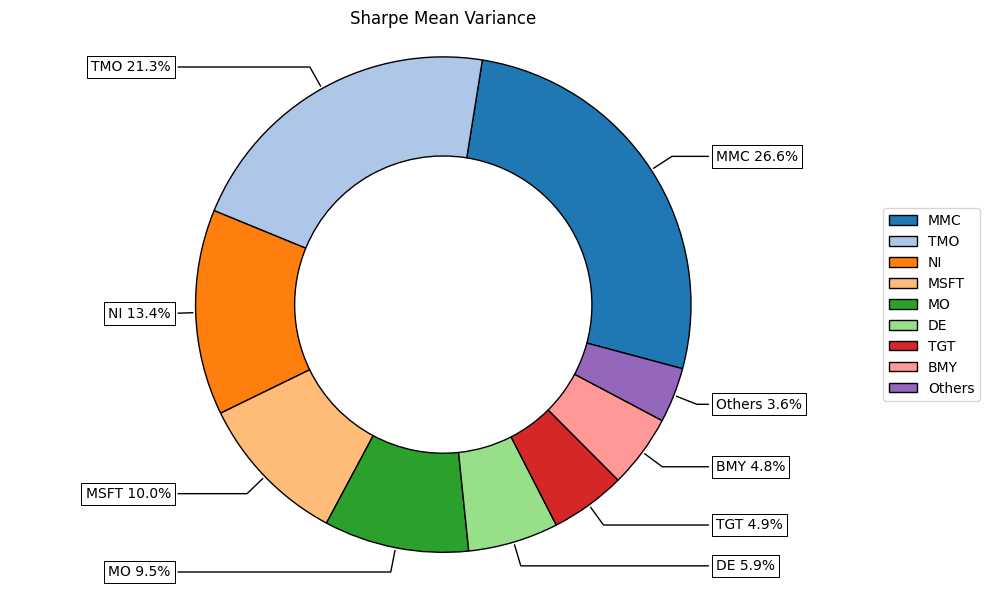

In [4]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [5]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,0.0003%,0.0002%,6.2920%,12.1918%,0.0001%,0.0001%,17.3214%,0.0001%,0.0002%,0.0001%,...,2.4895%,0.0001%,8.4124%,0.0001%,0.0001%,5.5583%,2.9079%,0.0002%,28.9340%,0.0002%
1,0.0000%,0.0000%,0.0000%,11.4078%,0.0000%,0.0000%,14.3842%,0.7398%,0.0000%,0.0000%,...,5.7727%,0.0000%,7.9833%,0.0000%,0.0000%,5.8043%,8.2872%,0.0000%,20.1668%,0.0000%
2,0.0000%,0.0000%,0.0000%,10.7460%,0.0000%,0.0000%,12.7234%,1.4449%,0.0000%,0.0000%,...,7.1749%,0.0000%,7.7581%,0.0000%,0.0000%,5.8670%,10.1564%,0.0000%,15.1047%,0.0000%
3,0.0000%,0.0000%,0.0000%,10.2833%,0.0000%,0.0000%,11.4929%,1.9149%,0.0000%,0.0000%,...,8.2686%,0.0000%,7.5837%,0.0000%,0.0000%,5.9566%,11.5401%,0.0000%,11.1889%,0.0000%
4,0.0000%,0.0000%,0.0000%,9.8764%,0.0000%,0.0000%,10.3917%,2.3362%,0.0000%,0.0000%,...,9.2155%,0.0000%,7.3590%,0.0000%,0.0000%,6.0845%,12.6711%,0.0000%,7.9283%,0.0000%


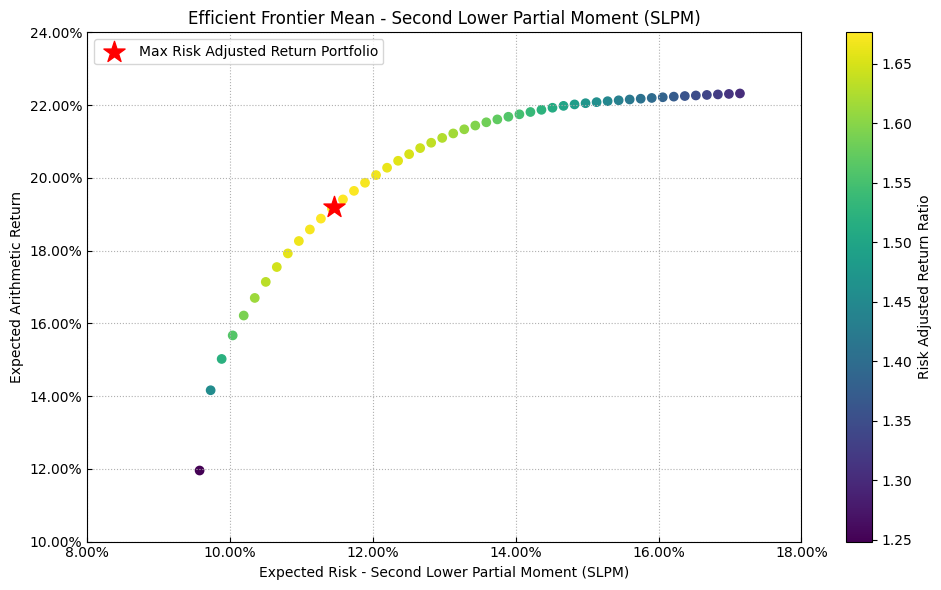

In [6]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

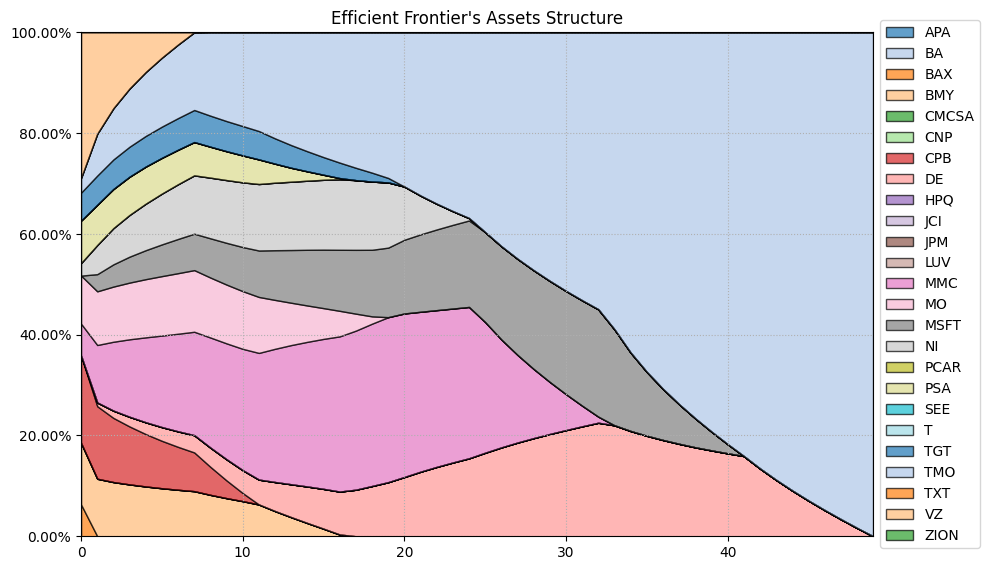

In [7]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

### Historical return analysis

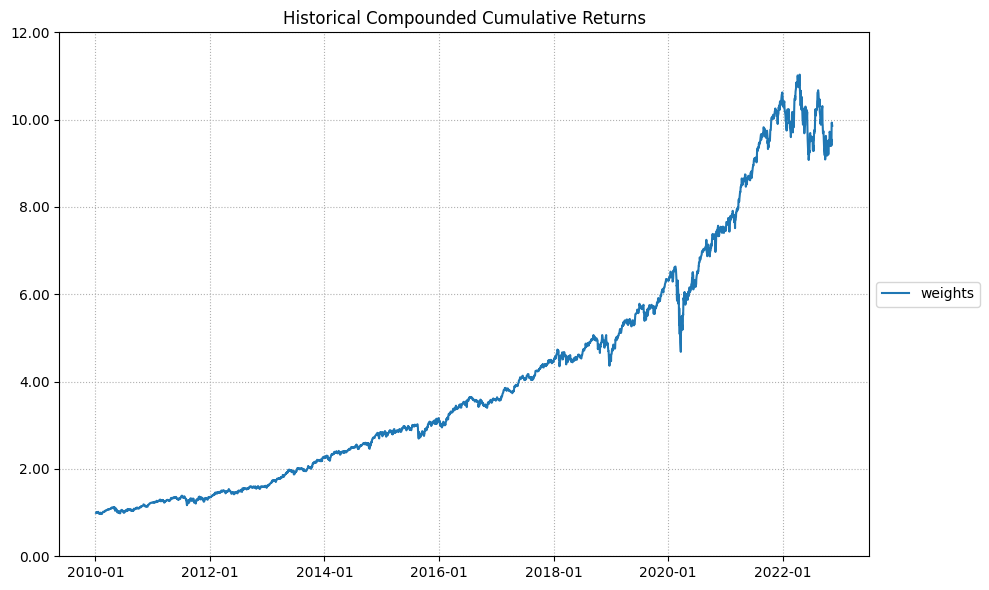

In [8]:
ws = frontier
ax = rp.plot_series(returns=Y, w=w, cmap='tab20', height=6, width=10,
                    ax=None)

### Volatility analysis

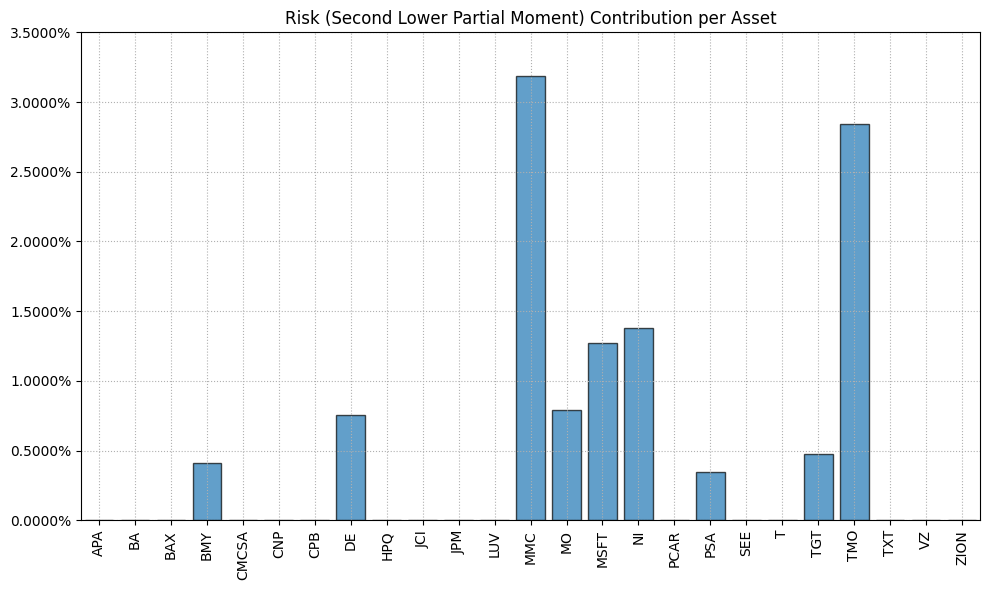

In [9]:
ax = rp.plot_risk_con(w=w, cov=cov, returns=returns, rm=rm,
                      rf=0, alpha=0.05, color="tab:blue", height=6,
                      width=10, t_factor=252, ax=None)

In [10]:
wr = pd.DataFrame()
for col, w in zip(list(Y.columns),list(w['weights'])):
    wr[col] = Y[col]*w

Sharpe Ratio

In [11]:
wr['Total']= wr.sum(axis=1)
Sharpe_Ratio = (wr['Total'].mean()-rf)/wr['Total'].std()
Sharpe_Ratio*(252**0.5)



1.1530756915599356

In [36]:
returns = port.returns
rp.RiskFunctions.Sharpe(w=w, mu=mu, cov=cov, returns=returns, rm='MV', rf=rf)*(252**0.5) #, alpha=0.05, a_sim=100, beta=None, b_sim=None)

1.153075691559935

### Sortino Ratio

In [40]:
target_ret = wr['Total'].mean()

def SortinoRatio(returns, target_ret):
    """Calculates the Sortino ratio from univariate excess returns.


    Args:
        returns ([float]): The dataframe or pandas series of univariate excess returns.
        target_ret ([integer]): The targeted return. 
    """

    #downside deviation:

    temp = np.minimum(0, returns - target_ret)**2
    temp_expectation = np.mean(temp)
    downside_dev = np.sqrt(temp_expectation)

    #Sortino ratio:

    sortino_ratio = np.mean(returns - target_ret) / downside_dev

    return(sortino_ratio)

In [46]:
SortinoRatio(returns, target_ret)

APA     -1.6701%
BA      -0.4467%
BAX     -3.9629%
BMY     -1.7547%
CMCSA   -1.2201%
CNP     -2.2787%
CPB     -4.2919%
DE       0.7337%
HPQ     -2.1153%
JCI     -1.0839%
JPM     -1.1452%
LUV     -0.9862%
MMC      0.3609%
MO      -2.0735%
MSFT     0.7681%
NI      -0.7518%
PCAR    -1.4520%
PSA     -1.2230%
SEE     -1.8864%
T       -4.4656%
TGT     -0.9822%
TMO      1.1084%
TXT     -0.6320%
VZ      -5.4454%
ZION    -0.2054%
dtype: float64

In [47]:
# Create a downside return series with the negative returns only
downside_returns = wr.loc[wr['Total'] < target_ret]

# Calculate expected return and std dev of downside
expected_return = wr['pf_returns'].mean()
down_stdev = downside_returns['pf_returns'].std()

# Calculate the sortino ratio
sortino_ratio = (expected_return - rfr)/down_stdev

# Print the results
print("Expected return  : ", expected_return*100)
print("Downside risk   : ", down_stdev*100)
print("Sortino ratio : ", sortino_ratio)

Date
2010-01-05   -0.6493%
2010-01-06    0.9888%
2010-01-07    0.1566%
2010-01-08    0.2452%
2010-01-11    0.5932%
               ...   
2022-11-08    0.4992%
2022-11-09   -1.4847%
2022-11-10    5.0839%
2022-11-11    0.4670%
2022-11-14   -0.7194%
Name: Total, Length: 3239, dtype: float64